## Toy Problems Rozanoff 2025
### Autoencoders

This notebook explores autoencoders in Keras, as a dimensionality reduction technique.

Hyperparameters that can be tuned are
1) Number of layers
2) Number of nodes
3) Loss function
4) Size of latent space

### 1. Import Required Libraries

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

### 2. Autoencoder Fundamentals

An autoencoder is a neural network designed to learn efficient representations (encodings) of data. It consists of:
- **Encoder**: Compresses input data into a lower-dimensional latent representation
- **Latent space**: The bottleneck layer containing the compressed representation
- **Decoder**: Reconstructs the original input from the latent representation

The network is trained to minimize reconstruction error: $L = ||x - \hat{x}||^2$ where $x$ is the input and $\hat{x}$ is the reconstruction.

#### 2a. Load data

In [17]:
# Load the MNIST Data Set
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the Data and Reshape it to Float32
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape Data into Vectors (Flattening)
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

x_train.shape

(60000, 784)

60000 images, each having 784 pixels  
##### 2b. Training
Set 32 dimensions instead of 784

In [19]:
# Dimension of the Latent Space
encoding_dim = 32  

# Encoder + Layers
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(encoding_dim, activation='relu')(encoded)

# Decoder + Layers
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# Autoencoder Model with Encoder and Decoder
autoencoder = Model(input_img, decoded)

# Initialize Encoder Model for Test Set
encoder = Model(input_img, encoded)

# Decoder Model for Visualization of Test Set
encoded_input = Input(shape=(encoding_dim,))
decoder_layer1 = autoencoder.layers[-2]
decoder_layer2 = autoencoder.layers[-1]
decoded_output = decoder_layer2(decoder_layer1(encoded_input))
decoder = Model(encoded_input, decoded_output)

# Summary of the Autoencoder Model
autoencoder.summary()

# Compile the Model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the Model
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 209,968 (820.19 KB)

 Trainable params: 209,968 (820.19 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2247 - val_loss: 0.1449
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1302 - val_loss: 0.1181
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1133 - val_loss: 0.1077
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1059 - val_loss: 0.1020
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1017 - val_loss: 0.0986
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0987 - val_loss: 0.0962
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0966 - val_loss: 0.0946
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0953 - val_loss: 0.0936
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0943 - val_loss: 0.0928
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0934 - val_loss: 0.0920
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0927 - val_loss: 0.0914
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

##### 2c. Plotting

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step


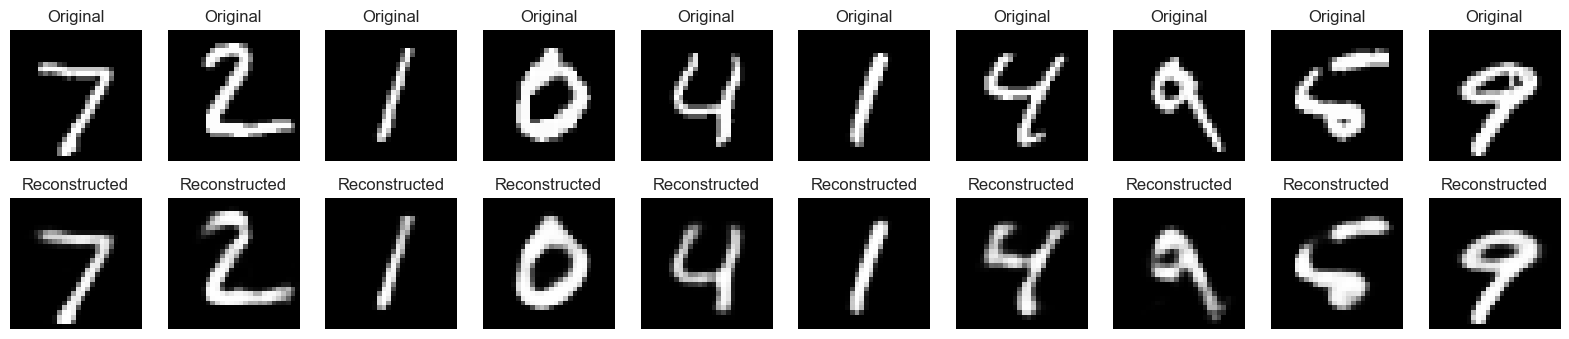

In [21]:
# Encode the test images to Latent Space
encoded_imgs = encoder.predict(x_test)

# Reconstruct the images from the Latent Space
decoded_imgs = decoder.predict(encoded_imgs)

# Visualize some of the original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()